In [1]:
library(tidyverse)
library(ggplot2)
library(ggalluvial)
library(rtracklayer)
library(reshape2)
library(patchwork)
library(ggvenn)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.0.10     ✔ readr     2.1.5 
✔ forcats   1.0.0      ✔ stringr   1.5.1 
✔ ggplot2   3.5.0      ✔ tibble    3.2.1 
✔ lubridate 1.9.3      ✔ tidyr     1.2.1 
✔ purrr     1.0.1      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘

In [2]:
TE <- import('/u/home/j/jadiruss/project-clarka/Genomes/mm39_STAR/TE/GRCm39_Ensembl_rmsk_TE.gtf')
TE <- as.data.frame(TE)

In [3]:
classes <- c("LTR", "LINE", "SINE")

totals <- TE %>%
    filter(class_id %in% classes) %>%
    group_by(gene_id) %>%
    tally()
cols <- c("gene_id", "total")
colnames(totals) <- cols
head(totals)

gene_id,total
<chr>,<int>
AmnL2-1,1311
AmnSINE1,1379
B1_Mm,42591
B1_Mur1,40892
B1_Mur2,28464
B1_Mur3,30511


In [4]:
alltimes <- read.delim(file = 'RPKM_LTRLINESINE_peaks_ATAC_soma.tsv', sep = "\t", header = F)
cols <- c("Chr", "Start", "End", "RPKM_E105_Male", "RPKM_E105_Female", "RPKM_E135_Male", "RPKM_E135_Female", "Chr_TE", "Start_TE", "End_TE", "TE_DupID", "TE_Subfamily", "TE_Length", "TE_Strand", "TE_Family", "TE_Class", "Overlap_Size")
colnames(alltimes) <- cols
head(alltimes)
chroms <- c(1:19)
alltimes <- filter(alltimes, Chr %in% chroms)
alltimes <- filter(alltimes, TE_Class %in% classes)

,Chr,Start,End,RPKM_E105_Male,RPKM_E105_Female,RPKM_E135_Male,RPKM_E135_Female,Chr_TE,Start_TE,End_TE,TE_DupID,TE_Subfamily,TE_Length,TE_Strand,TE_Family,TE_Class,Overlap_Size
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
1,16,3059165,3060156,8.963591,11.340818,11.437935,11.664904,16,3059801,3060578,L1MdV_III_dup10285,L1MdV_III,778,-,L1,LINE,355
2,16,3144294,3144571,10.876516,8.652715,11.218243,15.415687,16,3144220,3144354,B1_Mus2_dup60572,B1_Mus2,135,-,Alu,SINE,60
3,16,3144294,3144571,10.876516,8.652715,11.218243,15.415687,16,3144355,3144485,RLTR9A3_dup584,RLTR9A3,131,+,ERVK,LTR,130
4,16,3145248,3145893,9.393319,8.081467,10.436043,12.762412,16,3145487,3145794,RLTR11A2_dup2298,RLTR11A2,308,+,ERVK,LTR,307
5,16,3150637,3151285,4.882619,4.433243,5.905578,9.999051,16,3147796,3153172,RLTR4_MM-int_dup11169,RLTR4_MM-int,5377,+,LTR,LTR,648
6,16,3155529,3155875,9.963902,10.926154,12.159049,12.762195,16,3155168,3155602,MMERGLN_LTR_dup358,MMERGLN_LTR,435,+,ERV1,LTR,73


In [5]:
alltimes_dedup <- alltimes %>%
    group_by(Start) %>%
    filter(Overlap_Size == max(Overlap_Size)) %>%
    ungroup() %>%
    group_by(Start_TE) %>%
    filter(Overlap_Size == max(Overlap_Size)) %>%
    ungroup() %>%
    filter(Overlap_Size > 50)
nrow(alltimes)
nrow(alltimes_dedup)
alltimes_dedup

[1] 39211

[1] 33639

Chr,Start,End,RPKM_E105_Male,RPKM_E105_Female,RPKM_E135_Male,RPKM_E135_Female,Chr_TE,Start_TE,End_TE,TE_DupID,TE_Subfamily,TE_Length,TE_Strand,TE_Family,TE_Class,Overlap_Size
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
16,3059165,3060156,8.963591,11.340818,11.437935,11.6649038,16,3059801,3060578,L1MdV_III_dup10285,L1MdV_III,778,-,L1,LINE,355
16,3144294,3144571,10.876516,8.652715,11.218243,15.4156866,16,3144355,3144485,RLTR9A3_dup584,RLTR9A3,131,+,ERVK,LTR,130
16,3145248,3145893,9.393319,8.081467,10.436043,12.7624118,16,3145487,3145794,RLTR11A2_dup2298,RLTR11A2,308,+,ERVK,LTR,307
16,3150637,3151285,4.882619,4.433243,5.905578,9.9990511,16,3147796,3153172,RLTR4_MM-int_dup11169,RLTR4_MM-int,5377,+,LTR,LTR,648
16,3155529,3155875,9.963902,10.926154,12.159049,12.7621949,16,3155603,3155872,RLTR21_dup3248,RLTR21,270,+,ERVK,LTR,269
16,3156109,3157041,11.086325,14.427072,13.957666,13.8897380,16,3156595,3157124,RLTR11A_dup2191,RLTR11A,530,+,ERVK,LTR,446
16,3157144,3159525,10.914600,9.940176,9.301208,10.7720234,16,3157801,3158569,RLTR22_Mur_dup2181,RLTR22_Mur,769,-,ERVK,LTR,768
16,3159744,3159999,12.622098,12.165347,13.276764,10.4696412,16,3159137,3160525,L1_Mur3_dup20481,L1_Mur3,1389,+,L1,LINE,255
16,3168608,3168900,17.322840,16.699493,18.462678,22.0861903,16,3168633,3168770,B1_Mus2_dup60574,B1_Mus2,138,-,Alu,SINE,137


In [7]:
alltimes_dedup_label <- alltimes_dedup %>% 
    mutate(Case_E105_Male = case_when(((RPKM_E105_Male >= 10) ~ "Open"), TRUE ~ "Closed")) %>%
    mutate(Case_E135_Male = case_when(((RPKM_E135_Male >= 10) ~ "Open"), TRUE ~ "Closed")) %>%
    mutate(Case_E105_Female = case_when(((RPKM_E105_Female >= 10) ~ "Open"), TRUE ~ "Closed")) %>%
    mutate(Case_E135_Female = case_when(((RPKM_E135_Female >= 10) ~ "Open"), TRUE ~ "Closed"))
#head(alltimes_dedup_label)

keep <- c(1:3,12,15,16,18:21)
alltimes_dedup_label_status_only <- alltimes_dedup_label[,keep]
head(alltimes_dedup_label_status_only)

Chr,Start,End,TE_Subfamily,TE_Family,TE_Class,Case_E105_Male,Case_E135_Male,Case_E105_Female,Case_E135_Female
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
16,3059165,3060156,L1MdV_III,L1,LINE,Closed,Open,Open,Open
16,3144294,3144571,RLTR9A3,ERVK,LTR,Open,Open,Closed,Open
16,3145248,3145893,RLTR11A2,ERVK,LTR,Closed,Open,Closed,Open
16,3150637,3151285,RLTR4_MM-int,LTR,LTR,Closed,Closed,Closed,Closed
16,3155529,3155875,RLTR21,ERVK,LTR,Closed,Open,Open,Open
16,3156109,3157041,RLTR11A,ERVK,LTR,Open,Open,Open,Open


In [8]:
males <- c(1:5,7:8)
labels_male <- alltimes_dedup_label_status_only[,males]
labels_male
#
females <- c(1:5,9:10)
labels_female <- alltimes_dedup_label_status_only[,females]
labels_female

Chr,Start,End,TE_Subfamily,TE_Family,Case_E105_Male,Case_E135_Male
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
16,3059165,3060156,L1MdV_III,L1,Closed,Open
16,3144294,3144571,RLTR9A3,ERVK,Open,Open
16,3145248,3145893,RLTR11A2,ERVK,Closed,Open
16,3150637,3151285,RLTR4_MM-int,LTR,Closed,Closed
16,3155529,3155875,RLTR21,ERVK,Closed,Open
16,3156109,3157041,RLTR11A,ERVK,Open,Open
16,3157144,3159525,RLTR22_Mur,ERVK,Open,Closed
16,3159744,3159999,L1_Mur3,L1,Open,Open
16,3168608,3168900,B1_Mus2,Alu,Open,Open


Chr,Start,End,TE_Subfamily,TE_Family,Case_E105_Female,Case_E135_Female
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
16,3059165,3060156,L1MdV_III,L1,Open,Open
16,3144294,3144571,RLTR9A3,ERVK,Closed,Open
16,3145248,3145893,RLTR11A2,ERVK,Closed,Open
16,3150637,3151285,RLTR4_MM-int,LTR,Closed,Closed
16,3155529,3155875,RLTR21,ERVK,Open,Open
16,3156109,3157041,RLTR11A,ERVK,Open,Open
16,3157144,3159525,RLTR22_Mur,ERVK,Closed,Open
16,3159744,3159999,L1_Mur3,L1,Open,Open
16,3168608,3168900,B1_Mus2,Alu,Open,Open


In [18]:
tally_male <- alltimes_dedup_label_status_only %>%
    group_by(Case_E105_Male, Case_E135_Male) %>%
    tally()

tally_male

tally_female <- alltimes_dedup_label_status_only %>%
    group_by(Case_E105_Female, Case_E135_Female) %>%
    tally()

tally_female

Case_E105_Male,Case_E135_Male,n
<chr>,<chr>,<int>
Closed,Closed,5613
Closed,Open,10253
Open,Closed,8153
Open,Open,9620


Case_E105_Female,Case_E135_Female,n
<chr>,<chr>,<int>
Closed,Closed,8139
Closed,Open,4357
Open,Closed,15991
Open,Open,5152


In [34]:
is_alluvia_form(as.data.frame(tally_male), axes = 1:3, silent = TRUE)

[1] TRUE

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


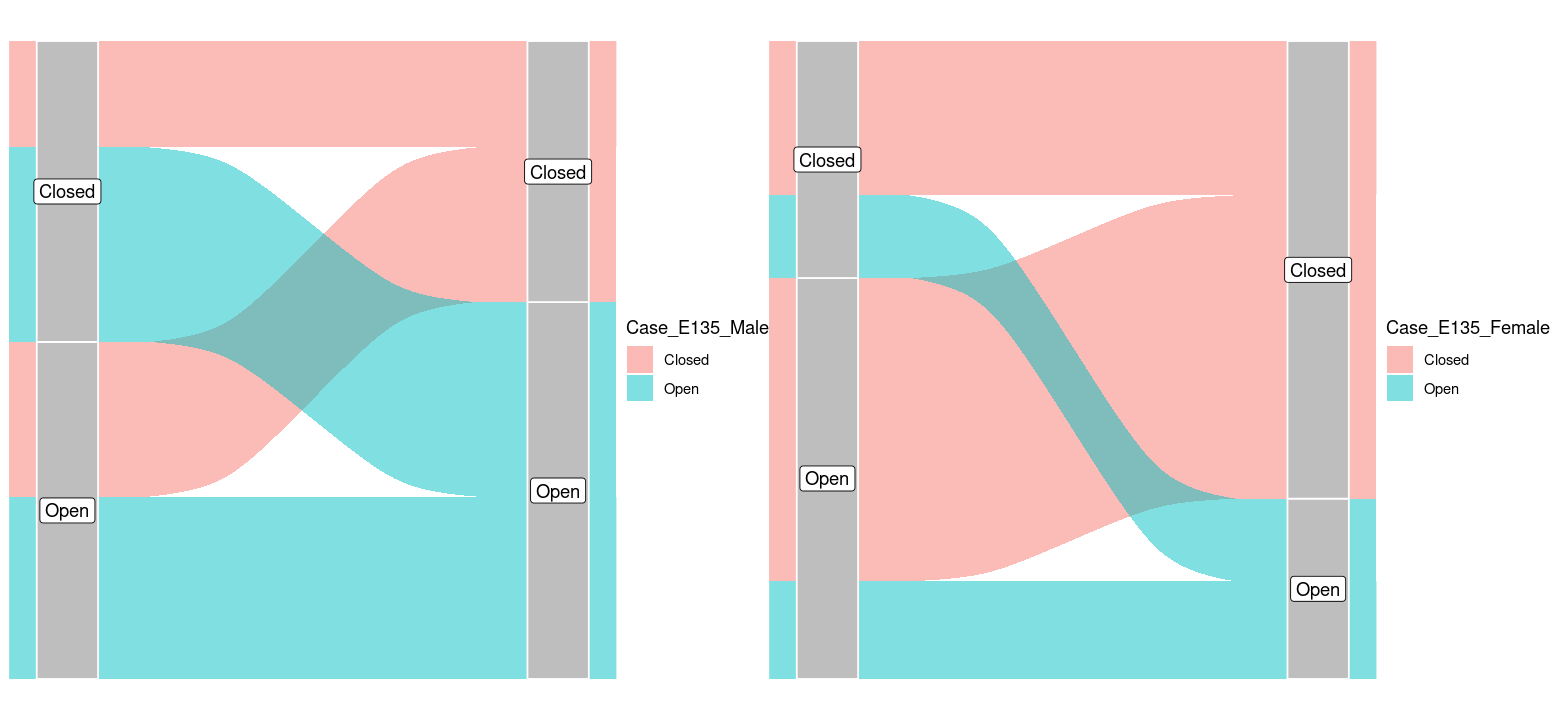

In [19]:
options(repr.plot.height = 6, repr.plot.width = 13)
p1 <- ggplot(as.data.frame(tally_male),aes(y = n, axis1 = Case_E105_Male, axis2 = Case_E135_Male)) + geom_alluvium(aes(fill = Case_E135_Male)) +  geom_stratum(width = 1/8, fill = "grey", color = "white") +
  geom_label(stat = "stratum", aes(label = after_stat(stratum))) + theme_void()

p2 <- ggplot(as.data.frame(tally_female),aes(y = n, axis1 = Case_E105_Female, axis2 = Case_E135_Female)) + geom_alluvium(aes(fill = Case_E135_Female)) +  geom_stratum(width = 1/8, fill = "grey", color = "white") +
  geom_label(stat = "stratum", aes(label = after_stat(stratum))) + theme_void()
#
p1 + p2

In [20]:
pdf(file = 'male_female_soma_ATAC_alluvial_LTRLINESINE.pdf', width = 14, height = 6)
p1 + p2
dev.off()

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


png 
  2

In [21]:
nrow(labels_male)

male_OC <- labels_male %>%
    filter(Case_E105_Male == "Open" & Case_E135_Male == "Closed") %>%
    group_by(TE_Subfamily) %>%
    tally()
#male_E105

male_OC <- inner_join(male_OC, totals, by = c("TE_Subfamily" = "gene_id"))
male_OC$percent <- (male_OC$n/male_OC$total) * 100
male_OC$peak_rep <- (male_OC$n/sum(male_OC$n)) * 100
male_OC <- male_OC[order(male_OC$percent, decreasing = T), ]
male_OC

[1] 33639

TE_Subfamily,n,total,percent,peak_rep
<chr>,<int>,<int>,<dbl>,<dbl>
RLTR13A3,83,248,33.467742,1.01803017
RLTR13A,64,197,32.487310,0.78498712
RLTR13A2,42,163,25.766871,0.51514780
RLTR13A1,47,184,25.543478,0.57647492
RLTR1F_Mm,13,96,13.541667,0.15945051
CR1-11_Crp,1,8,12.500000,0.01226542
X1_LINE,3,35,8.571429,0.03679627
RLTR1D,22,290,7.586207,0.26983932
RMER17A,138,2001,6.896552,1.69262848


In [22]:
nrow(labels_male)

male_CO <- labels_male %>%
    filter(Case_E105_Male == "Closed" & Case_E135_Male == "Open") %>%
    group_by(TE_Subfamily) %>%
    tally()
#male_E105

male_CO <- inner_join(male_CO, totals, by = c("TE_Subfamily" = "gene_id"))
male_CO$percent <- (male_CO$n/male_CO$total) * 100
male_CO$peak_rep <- (male_CO$n/sum(male_CO$n)) * 100
male_CO <- male_CO[order(male_CO$percent, decreasing = T), ]
male_CO

[1] 33639

TE_Subfamily,n,total,percent,peak_rep
<chr>,<int>,<int>,<dbl>,<dbl>
RLTR13B3,42,280,15.000000,0.409636204
RLTR30D_MM,23,248,9.274194,0.224324588
RLTR9D,67,763,8.781127,0.653467278
RLTR9D2,16,191,8.376963,0.156051887
MURVY-LTR,159,2161,7.357705,1.550765630
LTR81AB,4,57,7.017544,0.039012972
RLTR13B1,68,1047,6.494747,0.663220521
MER70-int,3,48,6.250000,0.029259729
LTR10_RN,34,545,6.238532,0.331610260


In [23]:
nrow(labels_male)

male_CC <- labels_male %>%
    filter(Case_E105_Male == "Closed" & Case_E135_Male == "Closed") %>%
    group_by(TE_Subfamily) %>%
    tally()
#male_E105

male_CC <- inner_join(male_CC, totals, by = c("TE_Subfamily" = "gene_id"))
male_CC$percent <- (male_CC$n/male_CC$total) * 100
male_CC$peak_rep <- (male_CC$n/sum(male_CC$n)) * 100
male_CC <- male_CC[order(male_CC$percent, decreasing = T), ]
male_CC

[1] 33639

TE_Subfamily,n,total,percent,peak_rep
<chr>,<int>,<int>,<dbl>,<dbl>
CR1-L3A_Croc,2,20,10.000000,0.03563157
UCON103,1,16,6.250000,0.01781578
RLTR1D,15,290,5.172414,0.26723677
RLTR13A1,9,184,4.891304,0.16034206
RLTR13A3,10,248,4.032258,0.17815785
X21_LINE,1,25,4.000000,0.01781578
ERVB4_1B-LTR_MM,25,632,3.955696,0.44539462
RLTR13A,7,197,3.553299,0.12471049
LTR86B2,1,29,3.448276,0.01781578


In [24]:
nrow(labels_male)

male_OO <- labels_male %>%
    filter(Case_E105_Male == "Open" & Case_E135_Male == "Open") %>%
    group_by(TE_Subfamily) %>%
    tally()
#male_E105

male_OO <- inner_join(male_OO, totals, by = c("TE_Subfamily" = "gene_id"))
male_OO$percent <- (male_OO$n/male_OO$total) * 100
male_OO$peak_rep <- (male_OO$n/sum(male_OO$n)) * 100
male_OO <- male_OO[order(male_OO$percent, decreasing = T), ]
male_OO

[1] 33639

TE_Subfamily,n,total,percent,peak_rep
<chr>,<int>,<int>,<dbl>,<dbl>
IAPEY4_LTR,41,97,42.268041,0.42619543
CR1-11_Crp,1,8,12.500000,0.01039501
ERVB4_1B-LTR_MM,67,632,10.601266,0.69646570
LTR41C,18,203,8.866995,0.18711019
RLTR13A2,11,163,6.748466,0.11434511
UCON103,1,16,6.250000,0.01039501
LTR41,25,402,6.218905,0.25987526
LTR41B,14,229,6.113537,0.14553015
RLTR1D2_MM,11,181,6.077348,0.11434511


In [25]:
female_OC <- labels_female %>%
    filter(Case_E105_Female == "Open" & Case_E135_Female == "Closed") %>%
    group_by(TE_Subfamily) %>%
    tally()
#male_E105

female_OC <- inner_join(female_OC, totals, by = c("TE_Subfamily" = "gene_id"))
female_OC$percent <- (female_OC$n/female_OC$total) * 100
female_OC$peak_rep <- (female_OC$n/sum(female_OC$n)) * 100
female_OC <- female_OC[order(female_OC$percent, decreasing = T), ]
female_OC

TE_Subfamily,n,total,percent,peak_rep
<chr>,<int>,<int>,<dbl>,<dbl>
RLTR13A,67,197,34.010152,0.41898568
RLTR13A2,50,163,30.674847,0.31267588
RLTR13A1,54,184,29.347826,0.33768995
RLTR13A3,60,248,24.193548,0.37521106
IAPEY4_LTR,17,97,17.525773,0.10630980
ERVB4_1B-LTR_MM,81,632,12.816456,0.50653493
RLTR1D,37,290,12.758621,0.23138015
RLTR1F_Mm,12,96,12.500000,0.07504221
UCON103,2,16,12.500000,0.01250704


In [26]:
nrow(labels_male)

female_CO <- labels_female %>%
    filter(Case_E105_Female == "Closed" & Case_E135_Female == "Open") %>%
    group_by(TE_Subfamily) %>%
    tally()

female_CO <- inner_join(female_CO, totals, by = c("TE_Subfamily" = "gene_id"))
female_CO$percent <- (female_CO$n/female_CO$total) * 100
female_CO$peak_rep <- (female_CO$n/sum(female_CO$n)) * 100
female_CO <- female_CO[order(female_CO$percent, decreasing = T), ]
female_CO

[1] 33639

TE_Subfamily,n,total,percent,peak_rep
<chr>,<int>,<int>,<dbl>,<dbl>
CR1-L3A_Croc,2,20,10.000000,0.04590314
RLTR48B,6,101,5.940594,0.13770943
LTR10_RN,28,545,5.137615,0.64264402
X21_LINE,1,25,4.000000,0.02295157
LTR81,2,53,3.773585,0.04590314
LTR85c,4,106,3.773585,0.09180629
MLTR12,16,464,3.448276,0.36722515
RLTR28,64,1941,3.297269,1.46890062
EUTREP16,2,61,3.278689,0.04590314


In [27]:
nrow(labels_male)

female_CC <- labels_female %>%
    filter(Case_E105_Female == "Closed" & Case_E135_Female == "Closed") %>%
    group_by(TE_Subfamily) %>%
    tally()
#male_E105

female_CC <- inner_join(female_CC, totals, by = c("TE_Subfamily" = "gene_id"))
female_CC$percent <- (female_CC$n/female_CC$total) * 100
female_CC$peak_rep <- (female_CC$n/sum(female_CC$n)) * 100
female_CC <- female_CC[order(female_CC$percent, decreasing = T), ]
female_CC

[1] 33639

TE_Subfamily,n,total,percent,peak_rep
<chr>,<int>,<int>,<dbl>,<dbl>
RLTR13B3,38,280,13.571429,0.46688782
RLTR9D2,17,191,8.900524,0.20887087
RLTR9D,65,763,8.519004,0.79862391
RLTR30D_MM,17,248,6.854839,0.20887087
MURVY-LTR,145,2161,6.709857,1.78154564
RLTR13B1,64,1047,6.112703,0.78633739
LTR81AB,3,57,5.263158,0.03685957
Eutr18,4,95,4.210526,0.04914609
LTR45,1,24,4.166667,0.01228652


In [28]:
nrow(labels_male)

female_OO <- labels_female %>%
    filter(Case_E105_Female == "Open" & Case_E135_Female == "Open") %>%
    group_by(TE_Subfamily) %>%
    tally()

female_OO <- inner_join(female_OO, totals, by = c("TE_Subfamily" = "gene_id"))
female_OO$percent <- (female_OO$n/female_OO$total) * 100
female_OO$peak_rep <- (female_OO$n/sum(female_OO$n)) * 100
female_OO <- female_OO[order(female_OO$percent, decreasing = T), ]
female_OO

[1] 33639

TE_Subfamily,n,total,percent,peak_rep
<chr>,<int>,<int>,<dbl>,<dbl>
IAPEY4_LTR,31,97,31.958763,0.60170807
CR1-11_Crp,2,8,25.000000,0.03881988
RLTR13A3,36,248,14.516129,0.69875776
ERVB4_1B-LTR_MM,46,632,7.278481,0.89285714
RLTR1D2_MM,12,181,6.629834,0.23291925
RLTR1F_Mm,6,96,6.250000,0.11645963
LTR41C,12,203,5.911330,0.23291925
RLTR13A,9,197,4.568528,0.17468944
UCON51,1,22,4.545455,0.01940994


In [29]:
male_CC <- male_CC[1:10,]
male_OO <- male_OO[1:10,]
male_OC <- male_OC[1:10,]
male_CO <- male_CO[1:10,]
#
female_CC <- female_CC[1:10,]
female_OO <- female_OO[1:10,]
female_OC <- female_OC[1:10,]
female_CO <- female_CO[1:10,]

png 
  2

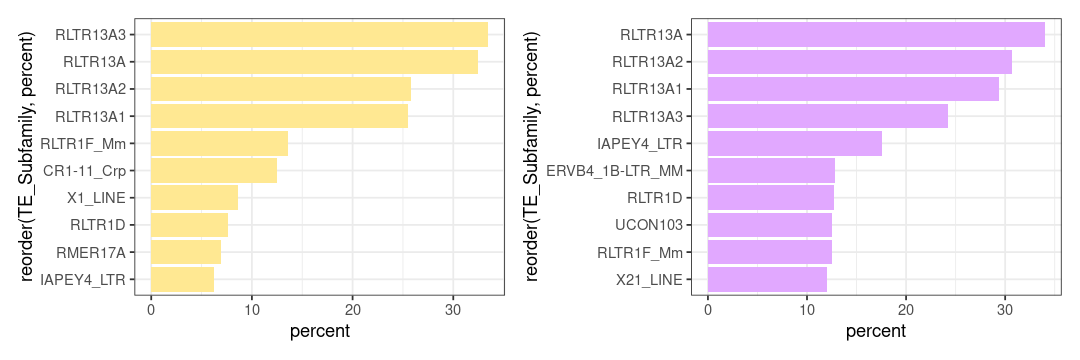

png 
  2

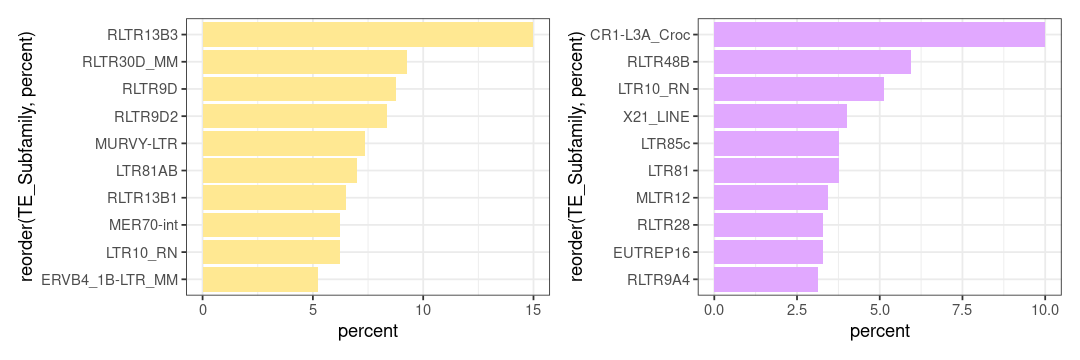

png 
  2

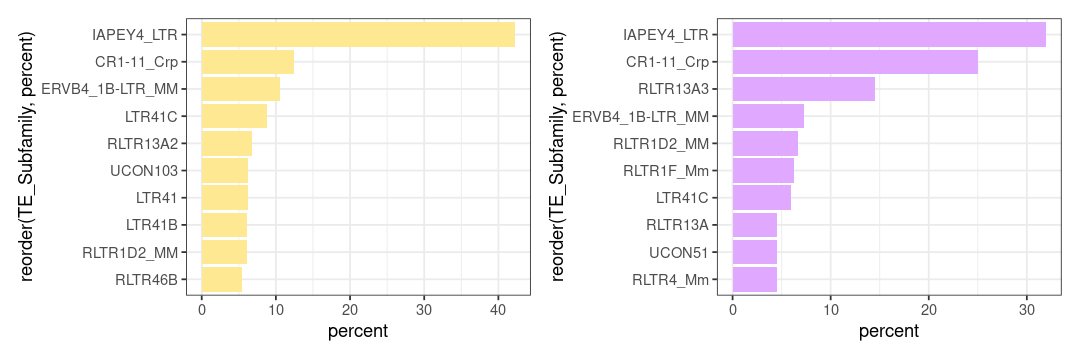

png 
  2

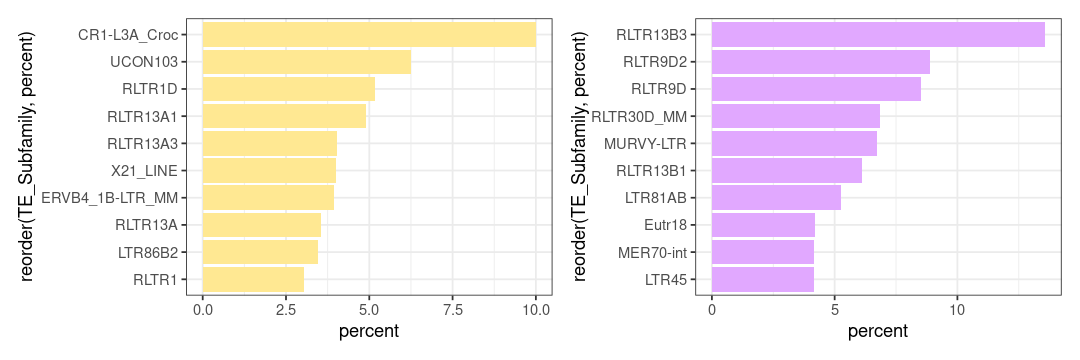

In [38]:
options(repr.plot.height = 3, repr.plot.width = 9)
p1 <- ggplot(male_OC, aes(reorder(TE_Subfamily, percent), percent)) + geom_bar(stat = "identity", fill = c("#ffe892")) + coord_flip() + theme_bw()
p2 <- ggplot(female_OC, aes(reorder(TE_Subfamily, percent), percent)) + geom_bar(stat = "identity", fill = c("#e1a8ff")) + coord_flip() + theme_bw()
p1 + p2

pdf(file = 'E105_E135_Soma_OC_LTRLINESINE_10-6.pdf', width = 9, height = 3)
p1 + p2
dev.off()
#
p1 <- ggplot(male_CO, aes(reorder(TE_Subfamily, percent), percent)) + geom_bar(stat = "identity", fill = c("#ffe892")) + coord_flip() + theme_bw()
p2 <- ggplot(female_CO, aes(reorder(TE_Subfamily, percent), percent)) + geom_bar(stat = "identity", fill = c("#e1a8ff")) + coord_flip() + theme_bw()
p1 + p2

pdf(file = 'E105_E135_Soma_CO_LTRLINESINE_10-6.pdf', width = 9, height = 3)
p1 + p2
dev.off()
#
p1 <- ggplot(male_OO, aes(reorder(TE_Subfamily, percent), percent)) + geom_bar(stat = "identity", fill = c("#ffe892")) + coord_flip() + theme_bw()
p2 <- ggplot(female_OO, aes(reorder(TE_Subfamily, percent), percent)) + geom_bar(stat = "identity", fill = c("#e1a8ff")) + coord_flip() + theme_bw()
p1 + p2

pdf(file = 'E105_E135_Soma_OO_LTRLINESINE_10-6.pdf', width = 9, height = 3)
p1 + p2
dev.off()
#
p1 <- ggplot(male_CC, aes(reorder(TE_Subfamily, percent), percent)) + geom_bar(stat = "identity", fill = c("#ffe892")) + coord_flip() + theme_bw()
p2 <- ggplot(female_CC, aes(reorder(TE_Subfamily, percent), percent)) + geom_bar(stat = "identity", fill = c("#e1a8ff")) + coord_flip() + theme_bw()
p1 + p2

pdf(file = 'E105_E135_Soma_CC_LTRLINESINE_10-6.pdf', width = 9, height = 3)
p1 + p2
dev.off()

In [9]:
#Export for HOMER

Male_OC <- labels_male %>%
    filter(Case_E105_Male == "Open" & Case_E135_Male == "Closed")
Male_OC <- Male_OC[,1:5]
write.table(Male_OC, file = 'E105_E135_Male_OC_ATACgonadal.bed', quote = F, sep = "\t", col.names = F, row.names = F)
#
Male_CO <- labels_male %>%
    filter(Case_E105_Male == "Closed" & Case_E135_Male == "Open")
Male_CO <- Male_CO[,1:5]
write.table(Male_CO, file = 'E105_E135_Male_CO_ATACgonadal.bed', quote = F, sep = "\t", col.names = F, row.names = F)

#
Female_OC <- labels_female %>%
    filter(Case_E105_Female == "Open" & Case_E135_Female == "Closed")
Female_OC <- Female_OC[,1:5]
write.table(Female_OC, file = 'E105_E135_Female_OC_ATACgonadal.bed', quote = F, sep = "\t", col.names = F, row.names = F)
#
Female_CO <- labels_female %>%
    filter(Case_E105_Female == "Closed" & Case_E135_Female == "Closed")
Female_CO <- Female_CO[,1:5]
write.table(Female_CO, file = 'E105_E135_Female_CO_ATACgonadal.bed', quote = F, sep = "\t", col.names = F, row.names = F)